In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf

In [2]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(testY[0:5])

[9 2 1 1 6]


In [4]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Since output/label is a category, we first need to convert it into One-Hot vectors. 

In [5]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes = 10)
testY = tf.keras.utils.to_categorical(testY, num_classes = 10)

In [6]:
testY[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

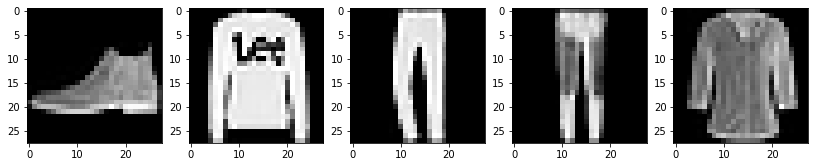

In [7]:
plt.figure(figsize=(14,14))
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(testX[i], cmap=plt.cm.binary_r)

In [8]:
model = Sequential()
model.add(keras.layers.Reshape((784,), input_shape=(28,28,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 17.1103 - accuracy: 0.7402 - val_loss: 13.9731 - val_accuracy: 0.7883
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 12.0101 - accuracy: 0.7885 - val_loss: 12.0152 - val_accuracy: 0.7782
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 11.1046 - accuracy: 0.7963 - val_loss: 9.3419 - val_accuracy: 0.8144
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 11.1045 - accuracy: 0.7983 - val_loss: 11.2170 - val_accuracy: 0.7809
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 10.2472 - accuracy: 0.8019 - val_loss: 12.5048 - val_accuracy: 0.7772
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 10.2726 - accuracy: 0.8056 - val_loss: 11.5978 - val_accuracy: 0.7709
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 10.0796 - accuracy: 0.8049 - val_loss: 19.2068 - 

Adding BatchNormalization:

In [10]:
model = Sequential()
model.add(keras.layers.Reshape((784,), input_shape=(28,28,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5553 - accuracy: 0.8067 - val_loss: 0.5019 - val_accuracy: 0.8347
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4757 - accuracy: 0.8360 - val_loss: 0.4931 - val_accuracy: 0.8351
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4627 - accuracy: 0.8388 - val_loss: 0.4942 - val_accuracy: 0.8382
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4549 - accuracy: 0.8413 - val_loss: 0.4853 - val_accuracy: 0.8395
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4493 - accuracy: 0.8435 - val_loss: 0.4913 - val_accuracy: 0.8410
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4433 - accuracy: 0.8452 - val_loss: 0.5034 - val_accuracy: 0.8318
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4407 - accuracy: 0.8468 - val_loss: 0.5097 - val_accuracy: